<a href="https://colab.research.google.com/github/Aclaude25/covid19/blob/main/covid_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import sklearn
import requests
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score


Faire une requête GET pour récupérer les données de l'API

In [ ]:
response = requests.get('https://covid.ourworldindata.org/data/owid-covid-data.json')

Vérifier si la requête a réussi (statut HTTP 200)

In [ ]:
if response.status_code == 200:
    data = response.json()  # Convertir les données JSON en dictionnaire Python
      # Créer une liste vide pour stocker les données de chaque ligne
    rows = []

    # Parcourir les données pour chaque pays
    for country_data in data.values():
        country_name = country_data['location']

        # Parcourir les données pour chaque jour
        for day_data in country_data['data']:
            # Ajouter le nom du pays et la date à chaque ligne
            row = {'Country': country_name, 'Date': day_data['date']}

            # Ajouter toutes les colonnes disponibles à chaque ligne
            for key, value in day_data.items():
                if key not in ['date', 'location']:
                    row[key] = value

            # Ajouter la ligne à la liste
            rows.append(row)

    # Créer un DataFrame à partir de la liste de données
    df = pd.DataFrame(rows)
else:
    print("Erreur lors de la requête à l'API")

In [ ]:
df.head()

,Country,Date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,...,new_tests,new_tests_per_thousand,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million
0,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tirer des informations du datafarme

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321904 entries, 0 to 321903
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Country                                     321904 non-null  object 
 1   Date                                        321904 non-null  object 
 2   new_cases                                   313024 non-null  float64
 3   new_deaths                                  313099 non-null  float64
 4   new_cases_per_million                       313024 non-null  float64
 5   new_deaths_per_million                      313099 non-null  float64
 6   stringency_index                            197651 non-null  float64
 7   new_cases_smoothed                          311765 non-null  float64
 8   new_deaths_smoothed                         311869 non-null  float64
 9   new_cases_smoothed_per_million              311765 non-null  float64
 

In [ ]:
df.isnull().sum()

Country                                            0
Date                                               0
new_cases                                       8880
new_deaths                                      8805
new_cases_per_million                           8880
new_deaths_per_million                          8805
stringency_index                              124253
new_cases_smoothed                             10139
new_deaths_smoothed                            10035
new_cases_smoothed_per_million                 10139
new_deaths_smoothed_per_million                10035
total_cases                                    37063
total_cases_per_million                        37063
total_deaths                                   58059
total_deaths_per_million                       58059
reproduction_rate                             137087
total_vaccinations                            245576
people_vaccinated                             248812
total_vaccinations_per_hundred                

In [ ]:
df.describe()

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,...,new_tests,new_tests_per_thousand,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million
count,3.130240e+05,313099.000000,313024.000000,313099.000000,197651.000000,3.117650e+05,311869.000000,311765.000000,311869.000000,2.848410e+05,...,7.540300e+04,75403.000000,36699.000000,36699.000000,37510.000000,37510.000000,22341.000000,22341.000000,9695.000000,9695.000000
mean,1.039078e+04,92.787703,156.958012,0.983383,42.714021,1.043132e+04,93.143020,157.568621,0.987115,6.039621e+06,...,6.728541e+04,3.272466,688.967274,16.640779,4017.341109,133.747268,4416.258359,88.380402,356.633419,10.790903
std,1.149393e+05,639.411651,1211.380928,5.316732,24.911007,9.850403e+04,582.578465,623.927302,2.876623,3.743113e+07,...,2.477340e+05,9.033843,2199.998628,23.215997,10142.661650,154.636606,11245.920571,90.052064,535.697698,14.025423
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,22.220000,7.140000e-01,0.000000,0.169000,0.000000,7.144000e+03,...,2.244000e+03,0.286000,23.000000,2.752000,204.000000,35.557500,259.000000,27.342000,26.000000,2.164000
50%,5.000000e+00,0.000000,0.538000,0.000000,42.590000,3.328600e+01,0.286000,9.226000,0.025000,6.343800e+04,...,8.783000e+03,0.971000,100.000000,7.276000,787.000000,81.888000,918.000000,62.744000,124.000000,5.614000
75%,3.440000e+02,4.000000,45.064250,0.241000,62.040000,5.962860e+02,6.286000,97.220000,0.704000,6.651880e+05,...,3.722900e+04,2.914000,445.000000,20.818000,3099.000000,170.627750,4099.000000,117.886000,457.500000,13.977000
max,8.401710e+06,27940.000000,228872.025000,603.656000,100.000000,6.402720e+06,14824.000000,37241.781000,148.641000,7.675180e+08,...,3.585563e+07,531.062000,28891.000000,180.675000,154497.000000,1526.846000,153977.000000,708.405000,4838.000000,224.976000


In [ ]:
df.shape

(321904, 50)

Recherche de Valeurs Abérrantes

new_cases                                        Axes(0.125,0.11;0.01379x0.77)
new_deaths                                    Axes(0.141548,0.11;0.01379x0.77)
new_cases_per_million                         Axes(0.158096,0.11;0.01379x0.77)
new_deaths_per_million                        Axes(0.174644,0.11;0.01379x0.77)
stringency_index                              Axes(0.191192,0.11;0.01379x0.77)
new_cases_smoothed                             Axes(0.20774,0.11;0.01379x0.77)
new_deaths_smoothed                           Axes(0.224288,0.11;0.01379x0.77)
new_cases_smoothed_per_million                Axes(0.240836,0.11;0.01379x0.77)
new_deaths_smoothed_per_million               Axes(0.257384,0.11;0.01379x0.77)
total_cases                                   Axes(0.273932,0.11;0.01379x0.77)
total_cases_per_million                        Axes(0.29048,0.11;0.01379x0.77)
total_deaths                                  Axes(0.307028,0.11;0.01379x0.77)
total_deaths_per_million                      Axes(0

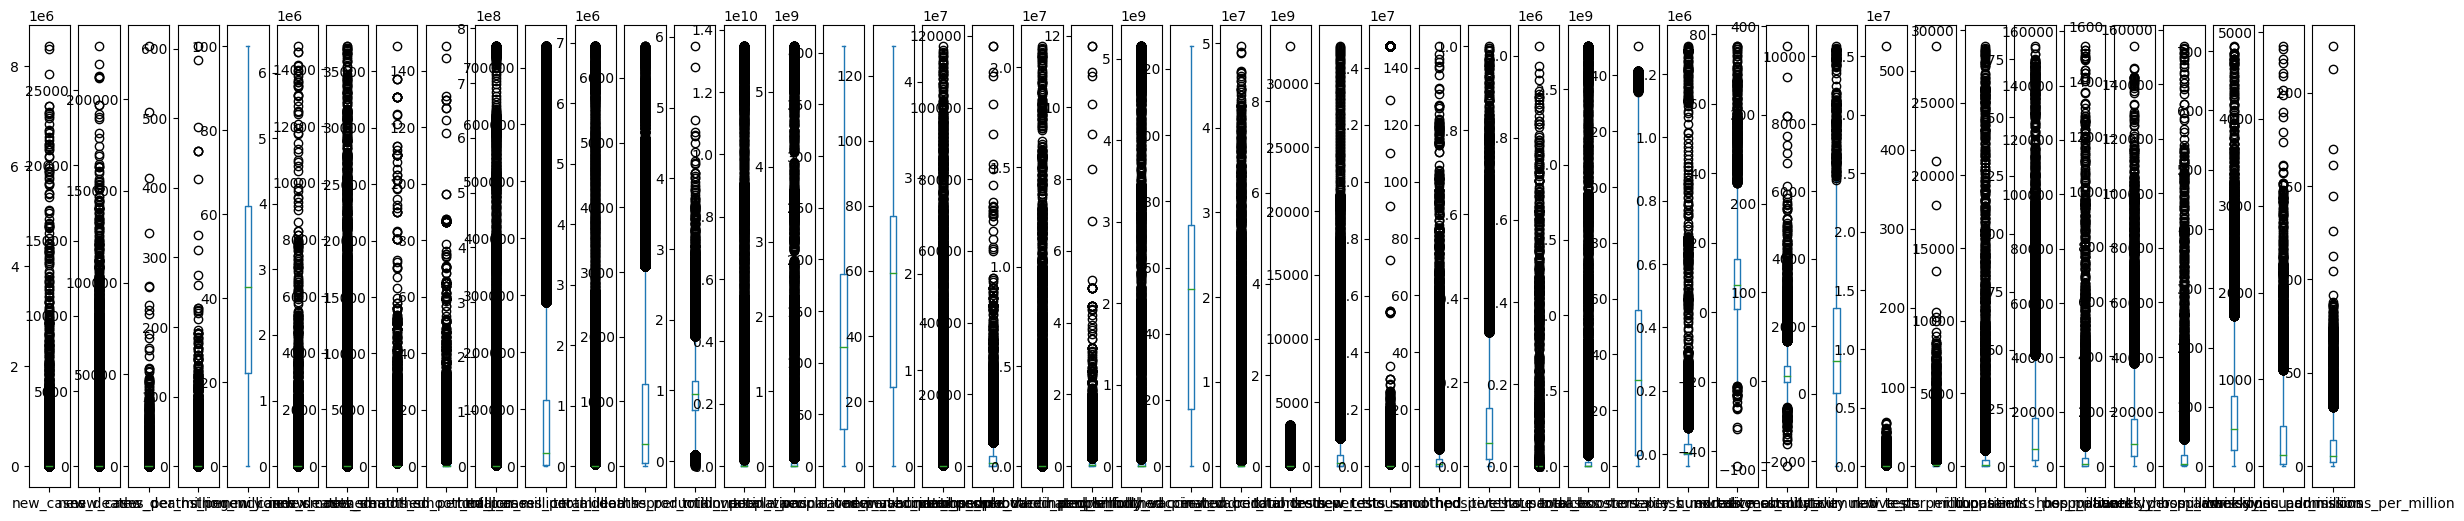

In [ ]:
df.plot(kind='box', subplots=True, figsize=(30, 6))

utilisons methode quartile pour traiter les valeurs abérantes

In [ ]:
cols_ = df.drop(['tests_units','Country','Date'], axis=1)
for col in cols_:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df= df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df.shape

(57305, 50)

Mise à l'échelle des valeurs

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df1=scaler.fit_transform(cols_)

In [ ]:
df1

array([[-0.09040248, -0.14511442, -0.1295697 , ...,         nan,
                nan,         nan],
       [-0.09040248, -0.14511442, -0.1295697 , ...,         nan,
                nan,         nan],
       [-0.09040248, -0.14511442, -0.1295697 , ...,         nan,
                nan,         nan],
       ...,
       [-0.09040248, -0.14511442, -0.1295697 , ...,         nan,
                nan,         nan],
       [-0.09040248, -0.14511442, -0.1295697 , ...,         nan,
                nan,         nan],
       [-0.09040248, -0.14511442, -0.1295697 , ...,         nan,
                nan,         nan]])

Visualisation

Analyse Univariée

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axe

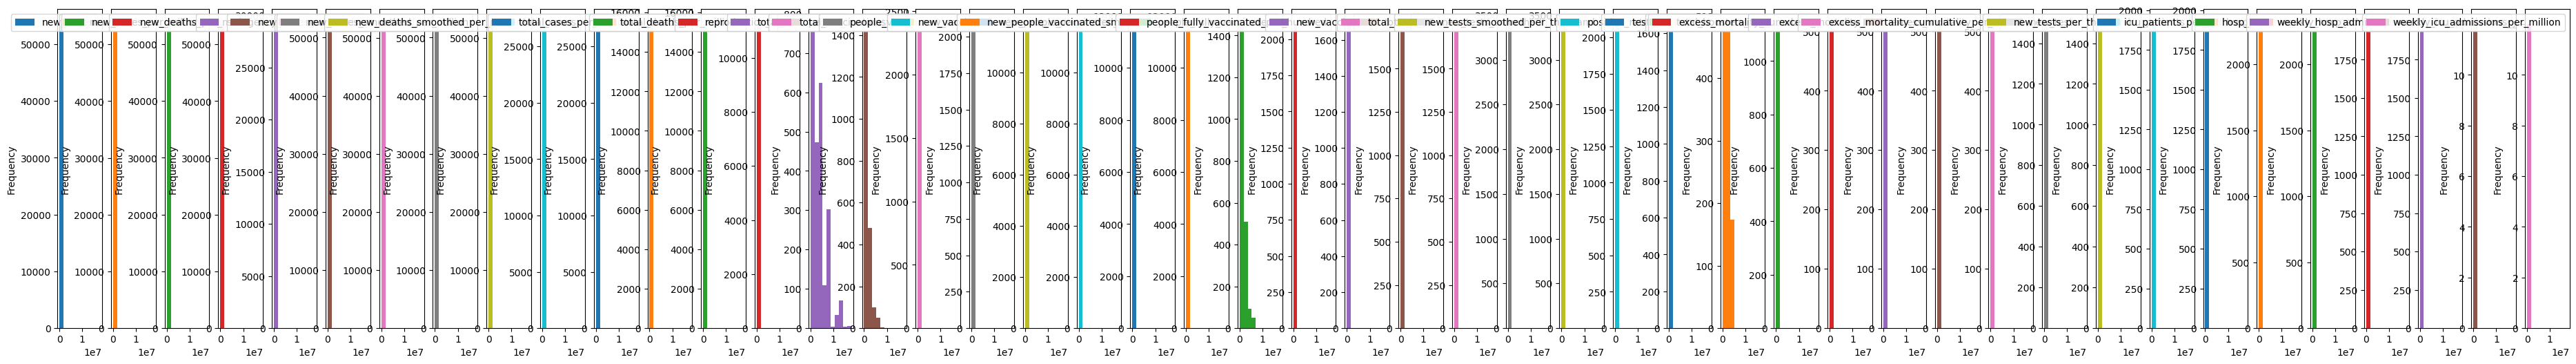

In [ ]:
df.plot(kind='hist', subplots=True, figsize=(50, 6), layout=(1, 50))

Analyse Bivariée

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_

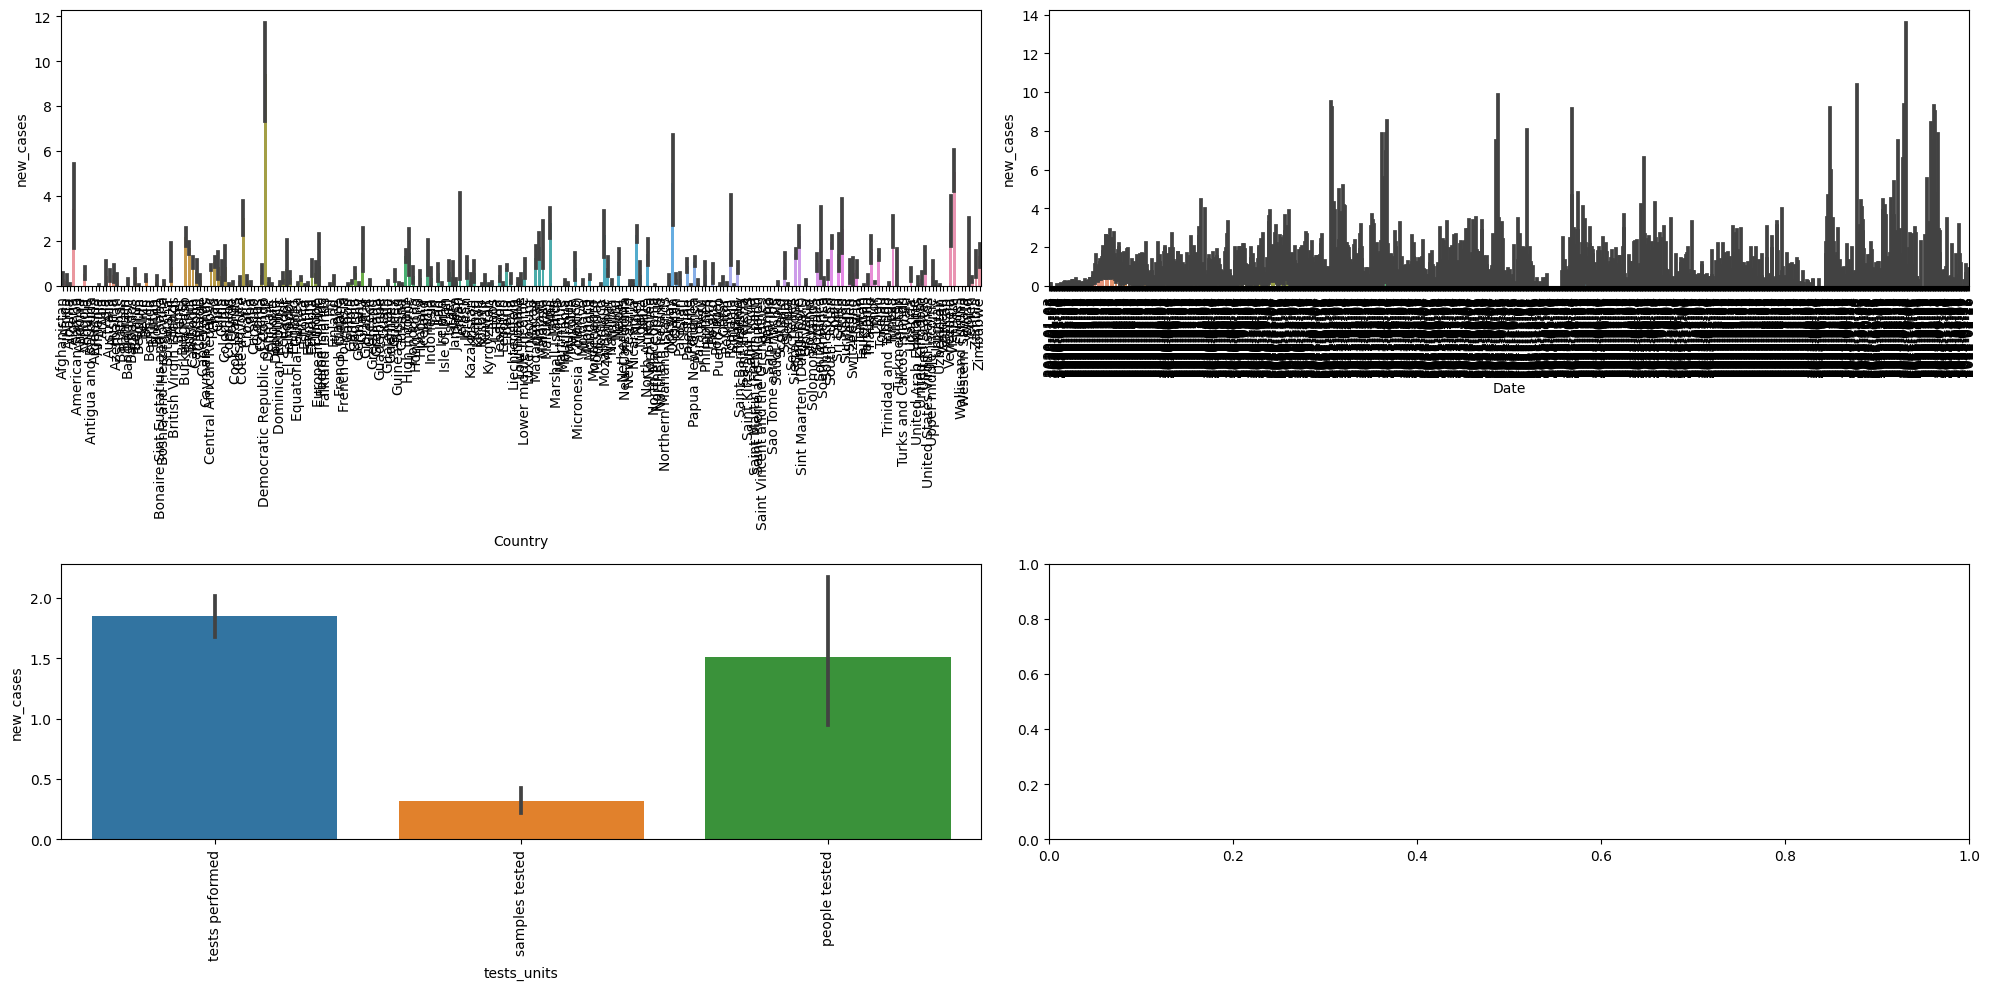

In [ ]:
cat_df = df.select_dtypes(include='object')

# Création de la figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()

# Création des Barplots
for i, var  in enumerate(list(cat_df.columns)):
  sns.barplot(x=var, y='new_cases', data=df, ax=axes[i])
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

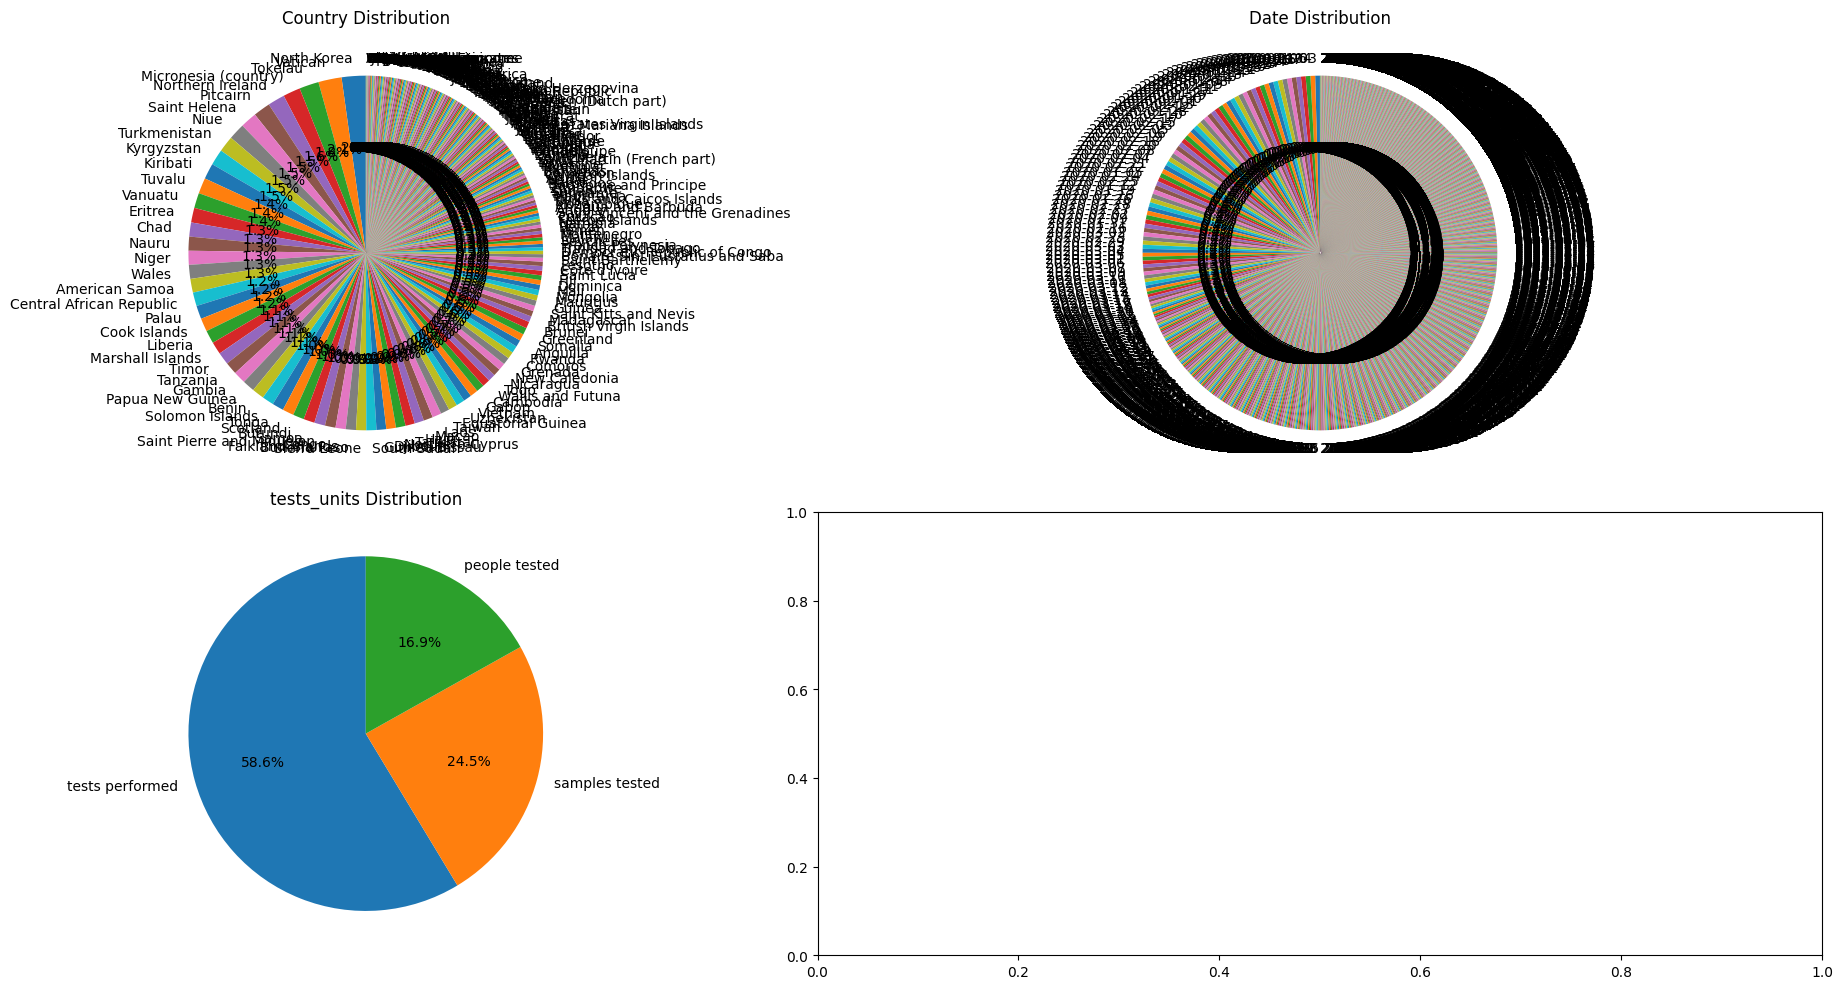

In [ ]:
# Création de la figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Création des Barplots
for i, var  in enumerate(list(cat_df.columns)):
  if i < len(axes.flat):
    cpt = df[var].value_counts()
    axes.flat[i].pie(cpt, labels=cpt.index, autopct='%1.1f%%', startangle=90)
    axes.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
plt.show()

Interpretation:
il en ressort qu'il y a une forte relation enttre la variable new_cases et les variables: contries, Dates, tes_units

<Axes: xlabel='new_cases', ylabel='total_deaths'>

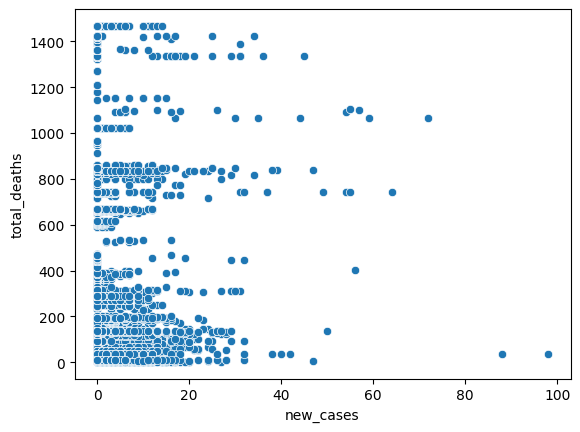

In [ ]:
sns.scatterplot(x='new_cases', y='total_deaths', data=df)

Interpretation: 0 à 40 nouveaux cas meurent

<Axes: xlabel='new_cases', ylabel='total_tests'>

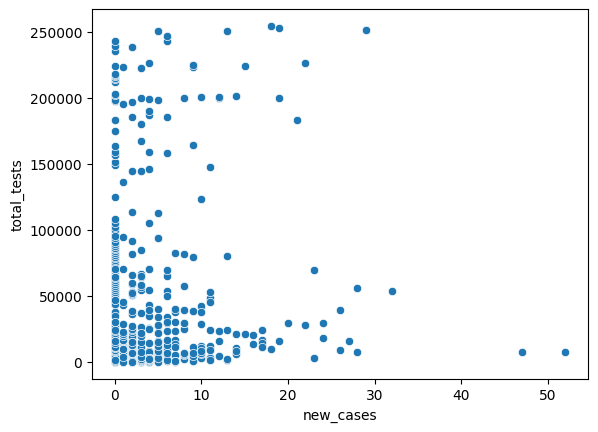

In [ ]:
sns.scatterplot(x='new_cases', y='total_tests', data=df)

Interpretation: nous avons de 0 à 30 nouveaux cas sur les textes totaux

<Axes: xlabel='new_tests', ylabel='new_cases'>

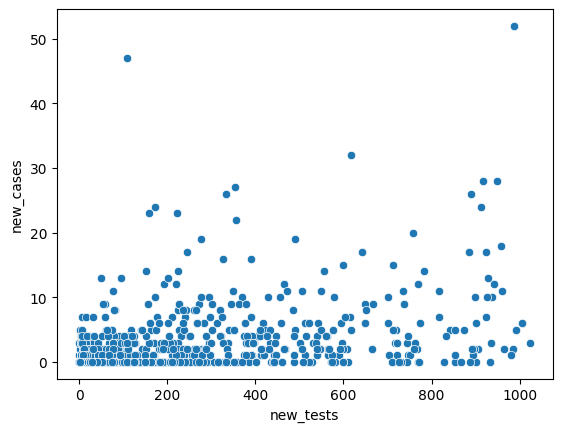

In [ ]:

sns.scatterplot(x='new_tests', y='new_cases', data=df)

Interpretation: 0 à 1200 nouveaux textes nous avons 0 à 10 nouveaux cas

<Axes: xlabel='new_cases', ylabel='hosp_patients'>

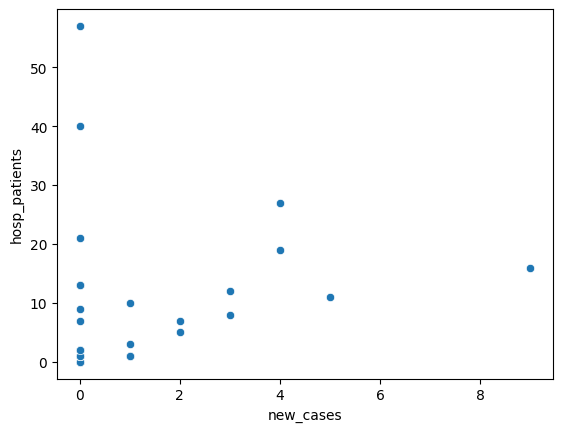

In [ ]:
sns.scatterplot(x='new_cases', y='hosp_patients', data=df)

Intrepretation: Parmi les patients hospitalisés nous avons 0 à 10 nouveaux cas

<Axes: xlabel='new_cases', ylabel='weekly_hosp_admissions'>

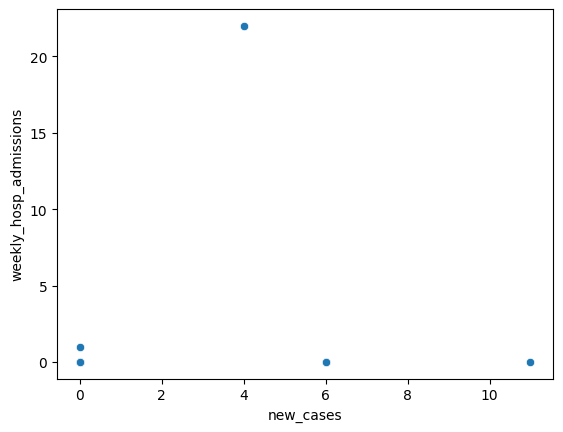

In [ ]:
sns.scatterplot(x='new_cases', y='weekly_hosp_admissions', data=df)

Interpretation: nous avons moins de nouveaux dans les admissions hebdomadaires

<Axes: xlabel='new_cases', ylabel='people_fully_vaccinated'>

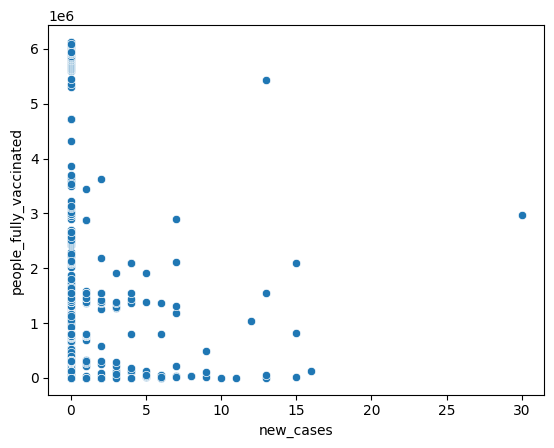

In [ ]:
sns.scatterplot(x='new_cases', y='people_fully_vaccinated', data=df)

Interpretation: De 0 à 20 nouveaux cas sont des personnes deja vaccissées

Encodage de données

In [ ]:
encoder= LabelEncoder()


In [ ]:
df["Country"] = encoder.fit_transform(df["Country"])
df["Date"] = encoder.fit_transform(df["Date"])
df["tests_units"] = encoder.fit_transform(df["tests_units"])


df['new_cases'].fillna(df['new_cases'].mean(), inplace=True)
df['new_deaths'].fillna(df['new_deaths'].mean(), inplace=True)
df['new_cases_per_million'].fillna(df['new_cases_per_million'].mean(), inplace=True)
df['new_deaths_per_million'].fillna(df['new_deaths_per_million'].mean(), inplace=True)
df['stringency_index'].fillna(df['stringency_index'].mean(), inplace=True)
df['new_cases_smoothed'].fillna(df['new_cases_smoothed'].mean(), inplace=True)
df['new_deaths_smoothed'].fillna(df['new_deaths_smoothed'].mean(), inplace=True)
df['total_cases'].fillna(df['total_cases'].mean(), inplace=True)
df['total_cases_per_million'].fillna(df['total_cases_per_million'].mean(), inplace=True)
df['total_deaths'].fillna(df['total_deaths'].mean(), inplace=True)
df['total_deaths_per_million'].fillna(df['total_deaths_per_million'].mean(), inplace=True)
df['reproduction_rate'].fillna(df['reproduction_rate'].mean(), inplace=True)
df['total_vaccinations'].fillna(df['total_vaccinations'].mean(), inplace=True)
df['people_vaccinated'].fillna(df['people_vaccinated'].mean(), inplace=True)
df['total_vaccinations_per_hundred'].fillna(df['total_vaccinations_per_hundred'].mean(), inplace=True)
df['new_vaccinations_smoothed'].fillna(df['new_vaccinations_smoothed'].mean(), inplace=True)
df['new_vaccinations_smoothed_per_million'].fillna(df['new_vaccinations_smoothed_per_million'].mean(), inplace=True)
df['new_people_vaccinated_smoothed'].fillna(df['new_people_vaccinated_smoothed'].mean(), inplace=True)
df['new_people_vaccinated_smoothed_per_hundred'].fillna(df['new_people_vaccinated_smoothed_per_hundred'].mean(), inplace=True)
df['people_fully_vaccinated'].fillna(df['people_fully_vaccinated'].mean(), inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna(df['people_fully_vaccinated_per_hundred'].mean(), inplace=True)
df['new_vaccinations'].fillna(df['new_vaccinations'].mean(), inplace=True)
df['total_tests_per_thousand'].fillna(df['total_tests_per_thousand'].mean(), inplace=True)
df['tests_units'].fillna(df['tests_units'].mean(), inplace=True)
df['new_tests_smoothed'].fillna(df['new_tests_smoothed'].mean(), inplace=True)
df['new_tests_smoothed_per_thousand'].fillna(df['new_tests_smoothed_per_thousand'].mean(), inplace=True)
df['positive_rate'].fillna(df['positive_rate'].mean(), inplace=True)
df['tests_per_case'].fillna(df['tests_per_case'].mean(), inplace=True)
df['total_boosters'].fillna(df['total_boosters'].mean(), inplace=True)
df['total_boosters_per_hundred'].fillna(df['total_boosters_per_hundred'].mean(), inplace=True)
df['excess_mortality_cumulative_absolute'].fillna(df['excess_mortality_cumulative_absolute'].mean(), inplace=True)
df['excess_mortality_cumulative'].fillna(df['excess_mortality_cumulative'].mean(), inplace=True)
df['excess_mortality'].fillna(df['excess_mortality'].mean(), inplace=True)
df['excess_mortality_cumulative_per_million'].fillna(df['excess_mortality_cumulative_per_million'].mean(), inplace=True)
df['new_tests'].fillna(df['new_tests'].mean(), inplace=True)
df['new_tests_per_thousand'].fillna(df['new_tests_per_thousand'].mean(), inplace=True)
df['icu_patients'].fillna(df['icu_patients'].mean(), inplace=True)
df['icu_patients_per_million'].fillna(df['icu_patients_per_million'].mean(), inplace=True)
df['hosp_patients_per_million'].fillna(df['hosp_patients_per_million'].mean(), inplace=True)
df['hosp_patients'].fillna(df['hosp_patients'].mean(), inplace=True)
df['weekly_hosp_admissions'].fillna(df['weekly_hosp_admissions'].mean(), inplace=True)
df['weekly_hosp_admissions_per_million'].fillna(df['weekly_hosp_admissions_per_million'].mean(), inplace=True)
df['weekly_icu_admissions'].fillna(df['weekly_icu_admissions'].mean(), inplace=True)
df['weekly_icu_admissions_per_million'].fillna(df['weekly_icu_admissions_per_million'].mean(), inplace=True)
df['new_cases_smoothed_per_million'].fillna(df['new_cases_smoothed_per_million'].mean(), inplace=True)
df['new_deaths_smoothed_per_million'].fillna(df['new_deaths_smoothed_per_million'].mean(), inplace=True)
df['people_vaccinated_per_hundred'].fillna(df['people_vaccinated_per_hundred'].mean(), inplace=True)
df['total_tests'].fillna(df['total_tests'].mean(), inplace=True)

selection des valeurs

Sélection

<Axes: >

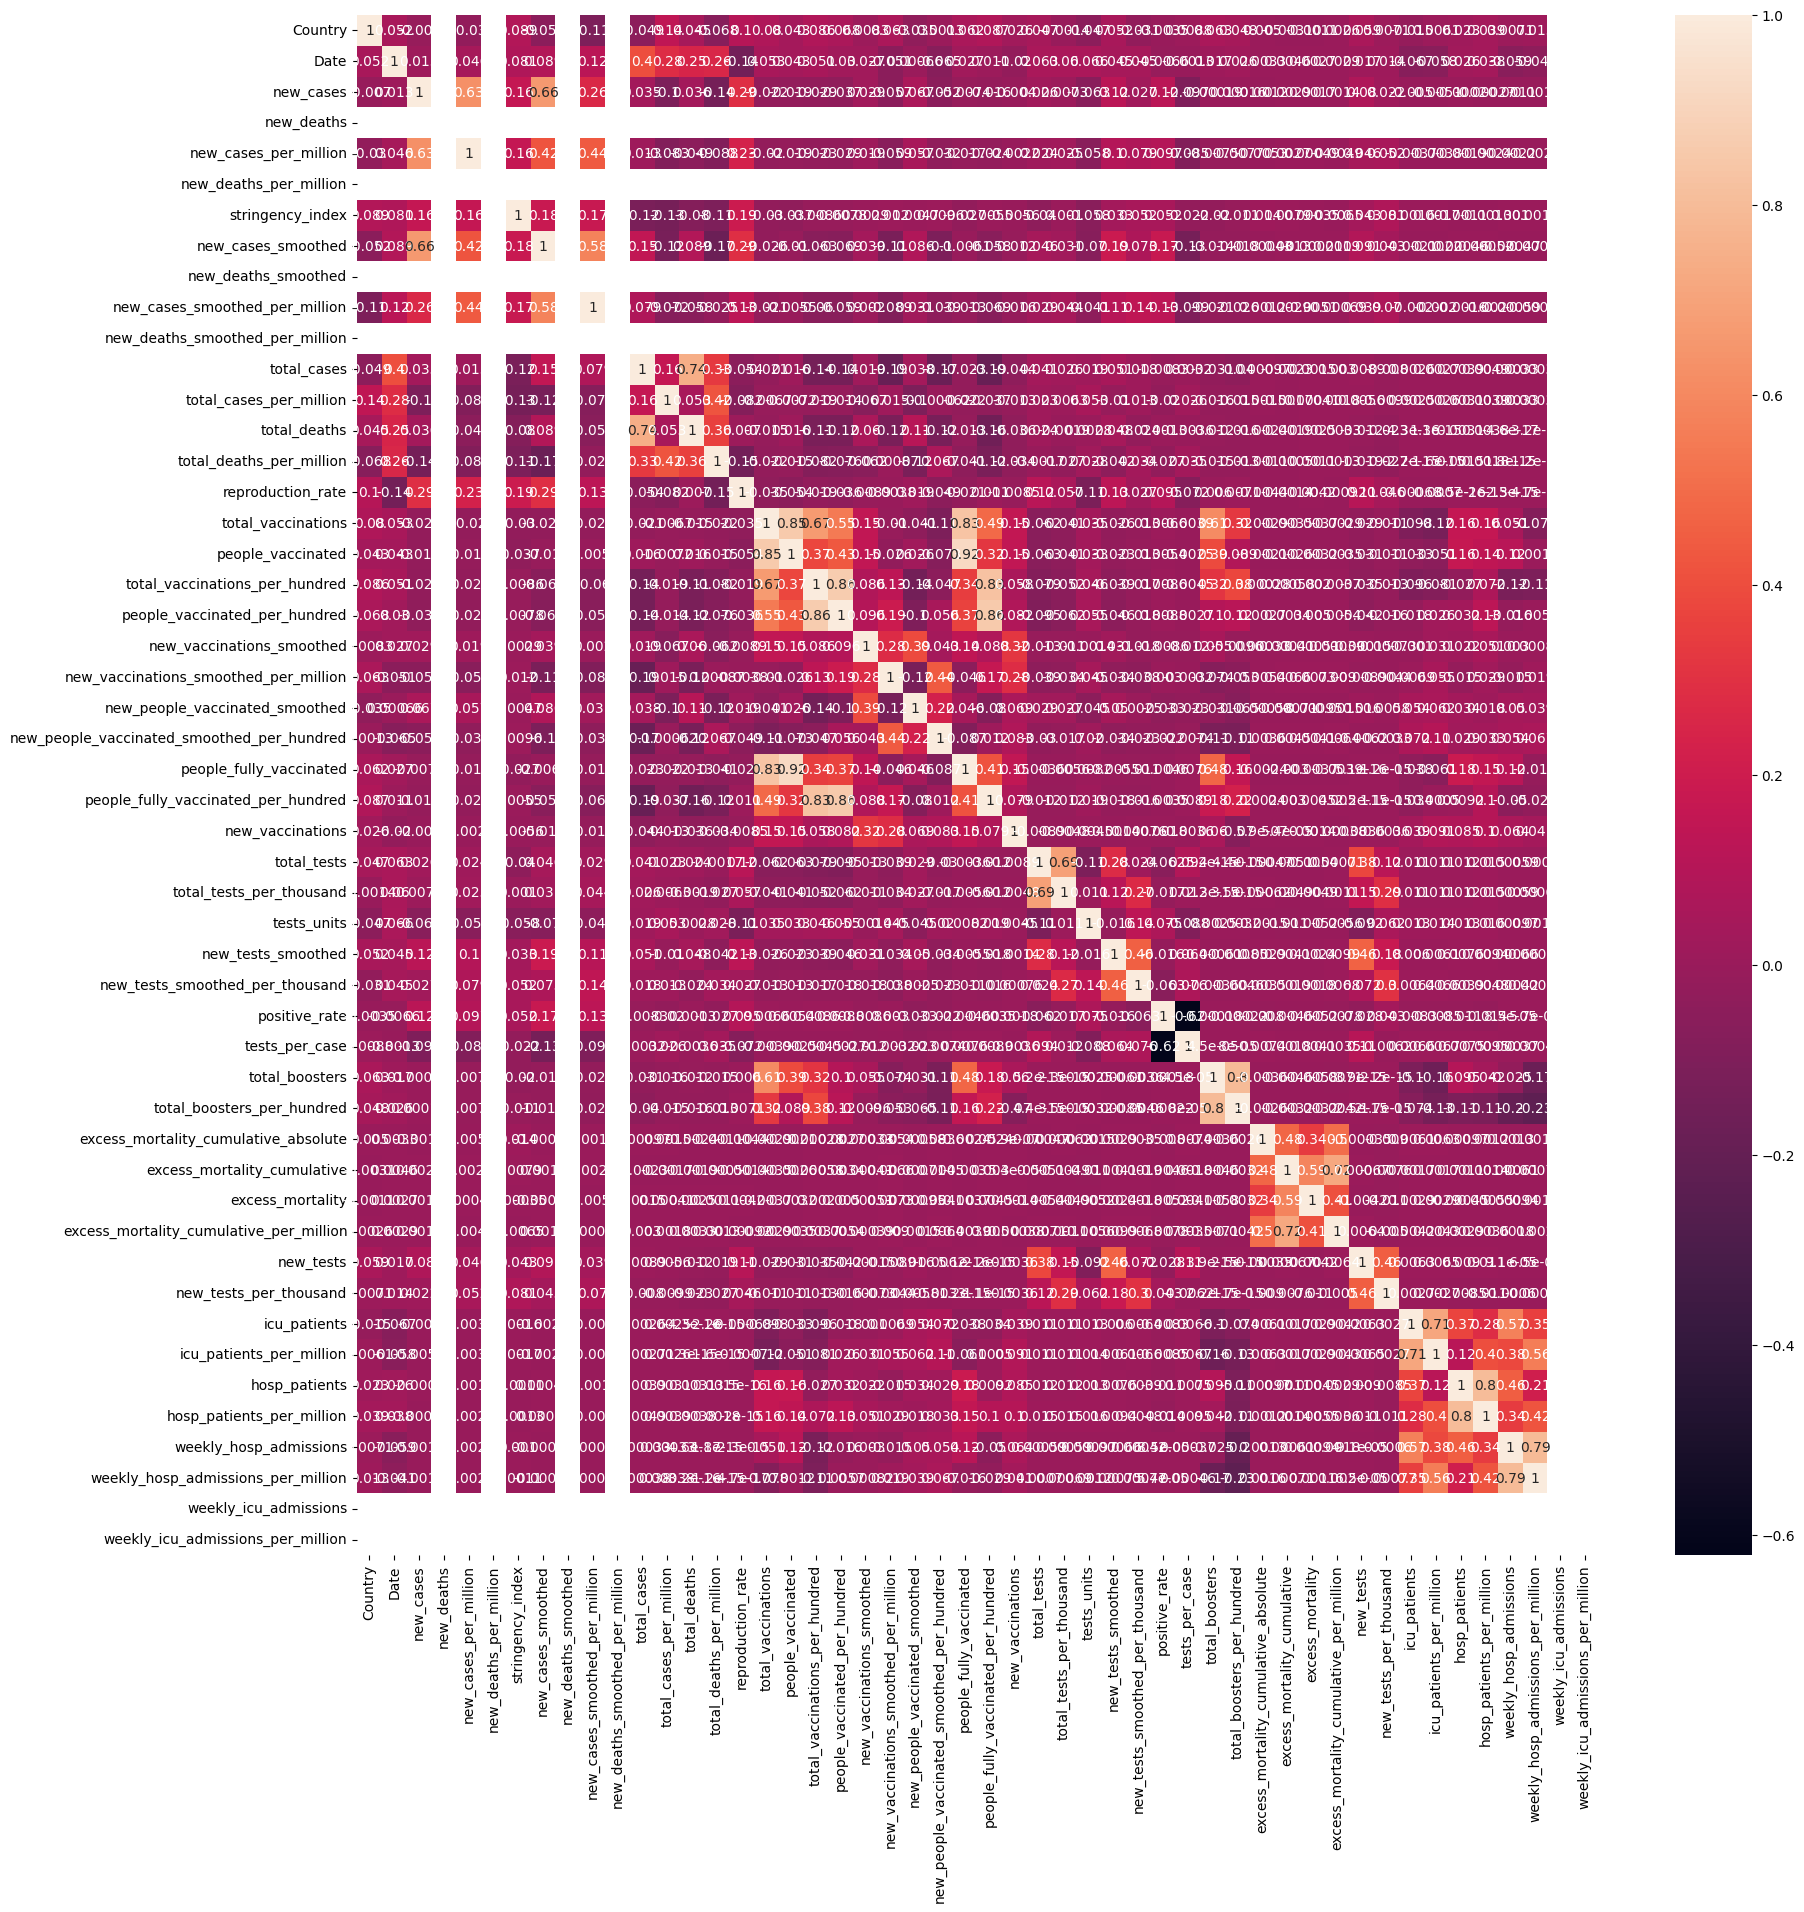

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

Les variables retenues sont: date, new_deaths, new_cases_per_million, stringency_index, new_caces_smoothed, new_deaths_smoothed, new_cases_smoothed_per_million, new_deaths_smoothed_per_million, total_cases, total_deaths, reproduction_rathe, new_vaccinations smoothed, new_people_vaccinated_smoothed, people_fuilly_vaccinated, new_vaccinations, total_tests, total_tests_per_thousand, tests_units, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, new_tests, new_tests_per_thousand, country, total_boosters, excessif_mortality, excess_mortality_cumulative_absolue, total_booster_per_hundred, excess_mortality_cumulative

In [ ]:
new_df= df.drop(['new_cases_per_million','new_tests_per_thousand','excess_mortality_cumulative','total_boosters_per_hundred','new_tests_smoothed_per_thousand','total_tests_per_thousand','new_deaths_smoothed_per_million','new_cases_smoothed_per_million','new_deaths_per_million','total_cases_per_million','total_deaths_per_million','total_vaccinations_per_hundred','people_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed_per_hundred','people_fully_vaccinated_per_hundred','hosp_patients_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','icu_patients','icu_patients_per_million','hosp_patients_per_million','excess_mortality_cumulative_per_million'], axis= 1)

choix du model

In [ ]:
new_df['new_cases']= new_df['new_cases'].astype('int64')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57305 entries, 0 to 320908
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               57305 non-null  int64  
 1   Date                                  57305 non-null  int64  
 2   new_cases                             57305 non-null  int64  
 3   new_deaths                            57305 non-null  float64
 4   stringency_index                      57305 non-null  float64
 5   new_cases_smoothed                    57305 non-null  float64
 6   new_deaths_smoothed                   57305 non-null  float64
 7   total_cases                           57305 non-null  float64
 8   total_deaths                          57305 non-null  float64
 9   reproduction_rate                     57305 non-null  float64
 10  total_vaccinations                    57305 non-null  float64
 11  people_vaccina

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
X=new_df.drop(['new_cases'], axis=1)
y= new_df['new_cases']

In [ ]:
y

0          0
1          0
2          0
3          0
4          0
          ..
320796     4
320797     4
320808     6
320809     0
320908    10
Name: new_cases, Length: 57305, dtype: int64

Regression multilinéaire

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
reg =LinearRegression()
reg.fit(X_train, y_train)
predict = reg.predict(X_test)
print(("R Squared : {}").format(metrics.r2_score(y_test, predict)))

R Squared : 0.4363325862768672


régression polynomiale

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)
X_train_fit = poly.fit_transform(X_train)
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  6666760.957888948
R squared:  -1140458.537769432


arbre de décision

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=10)
tree = tree.DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8919815024866941


forêt aléatoire

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
clf=RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test).round()
print(accuracy_score(y_test, y_pred))

0.8747673336435552


validation croisée

In [ ]:
clf= DecisionTreeRegressor(criterion='squared_error', max_depth=100,
           max_features=None, max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           splitter="best")

scores= cross_val_score(clf,X, y, cv=5)
print('Acuracy on each fold/subset:', scores)
print('The average acuracy is', sum(scores)/5)

Acuracy on each fold/subset: [-0.00288115 -2.5528874  -0.27633727 -0.56957892  0.01973791]
The average acuracy is -0.6763893658881097


In [ ]:
new_df.head()

,Country,Date,new_cases,new_deaths,stringency_index,new_cases_smoothed,new_deaths_smoothed,total_cases,total_deaths,reproduction_rate,...,total_tests,tests_units,new_tests_smoothed,positive_rate,tests_per_case,total_boosters,excess_mortality_cumulative_absolute,excess_mortality,new_tests,hosp_patients
0,0,2,0,0.0,0.0,0.662661,0.0,10290.068355,253.518858,0.529341,...,35593.924872,3,250.911098,0.010378,157.672104,1.692028e+06,-190.411134,-3.495781,220.985265,372.402603
1,0,3,0,0.0,0.0,0.662661,0.0,10290.068355,253.518858,0.529341,...,35593.924872,3,250.911098,0.010378,157.672104,1.692028e+06,-190.411134,-3.495781,220.985265,372.402603
2,0,4,0,0.0,0.0,0.662661,0.0,10290.068355,253.518858,0.529341,...,35593.924872,3,250.911098,0.010378,157.672104,1.692028e+06,-190.411134,-3.495781,220.985265,372.402603
3,0,5,0,0.0,0.0,0.662661,0.0,10290.068355,253.518858,0.529341,...,35593.924872,3,250.911098,0.010378,157.672104,1.692028e+06,-190.411134,-3.495781,220.985265,372.402603
4,0,6,0,0.0,0.0,0.662661,0.0,10290.068355,253.518858,0.529341,...,35593.924872,3,250.911098,0.010378,157.672104,1.692028e+06,-190.411134,-3.495781,220.985265,372.402603


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, StratifiedKFold

In [ ]:
new_df.to_csv("data.csv", encoding='utf-8', index=False)

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.4 MB/s eta 0:00:00


In [ ]:
%%writefile covid.py


import sklearn
import streamlit as st
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor


train_data = pd.read_csv('data.csv')


X=train_data.drop(['new_cases'], axis=1)
y=train_data['new_cases']


X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
clf=RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)

st.title('covidAppli')
st.header('covid predict')


Country= st.number_input('Country')
Date= st.number_input('Date')
new_deaths= st.number_input('new_deaths')
stringency_index= st.number_input('stringency_index')
new_cases_smoothed= st.number_input('new_cases_smoothed')
new_deaths_smoothed= st.number_input('new_deaths_smoothed')
total_cases= st.number_input('total_cases')
total_deaths= st.number_input('total_deaths')
reproduction_rate= st.number_input('reproduction_rate')
total_vaccination= st.number_input('total_vaccination')
people_vaccinated= st.number_input('people_vaccinated')
new_vaccinations_smoothed= st.number_input('new_vaccinations_smoothed')
new_people_vaccinated_smoothed= st.number_input('new_people_vaccinated_smoothed')
people_fully_vaccinated= st.number_input('people_fully_vaccinated')
new_vaccination= st.number_input('new_vaccination')
total_tests= st.number_input('total_tests')
tests_units= st.number_input('tests_units')
new_tests_smoothed= st.number_input('new_tests_smoothed')
positive_rate= st.number_input('positive_rate')
tests_per_case= st.number_input('tests_per_case')
total_boosters= st.number_input('total_boosters')
excess_mortality_cumulative_absolute= st.number_input('excess_mortality_cumulative_absolute')
excess_mortality= st.number_input('excess_mortality')
new_tests= st.number_input('new_tests')
hosp_patients= st.number_input('hosp_patients')


predict_button= st.button('Button_Predict')
if predict_button:
    X_data = [[hosp_patients,new_tests,excess_mortality,excess_mortality_cumulative_absolute,total_boosters,tests_per_case,positive_rate,new_tests_smoothed,tests_units,total_tests,new_vaccination,people_fully_vaccinated,new_people_vaccinated_smoothed,new_vaccinations_smoothed,people_vaccinated,total_vaccination,reproduction_rate,total_deaths,total_cases,new_deaths_smoothed,new_cases_smoothed,stringency_index,new_deaths,Date,Country]]
    y_pred=clf.predict(X_data)
    res =train_data.new_cases[y_pred[0]]
    st.write(f'new case is : {res}')


Writing covid.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.562s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run covid.py &>/content/logs.txt & curl ipv4.icanhazip.com

35.196.77.236


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.398s
your url is: https://spotty-plums-add.loca.lt
^C
